# Logistic Regression

[0 0]
[1 0]
[1 0]
[1 0]
[1 0]


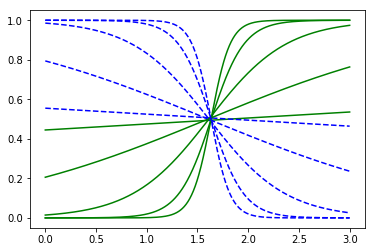

In [11]:
# REFERENCE
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import datasets

iris=datasets.load_iris()
list(iris.keys())

X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression

# penalty : str, ‘l1’ or ‘l2’, default: ‘l2’
for C in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=C)
    log_reg.fit(X,y)

    X_new = np.linspace(0,3,1000).reshape(-1,1)
    y_proba = log_reg.predict_proba(X_new) # outputs #classes values
    plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
    plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris-Virginica')

    print(log_reg.predict([[1.7], [1.5]]))
    

# Cross-validation

In [1]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [2]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


In [4]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))
        
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
         for train, test in k_fold.split(X_digits)]

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

In [5]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.93489149, 0.95659432, 0.93989983])

In [6]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro')

array([0.93969761, 0.95911415, 0.94041254])

# TestSpec Validation

# First model function